In [35]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins 
import scipy.stats

In [36]:
#Importing data
derecho_calls = pd.read_csv('../data/911_Phone Calls_Derecho_050320_050420.csv')
tornado_calls = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
derecho_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows = 2)
tornado_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows = 2)
damage_points = gpd.read_file('../data/damage_points.geojson')
path_polygons = gpd.read_file('../data/path_polygons.geojson')
tornado_paths = gpd.read_file('../data/tornado_paths.geojson')

In [37]:
#Dropping superfluous columns
derecho_calls = derecho_calls.drop('CallTypeId', 1)
tornado_calls = tornado_calls.drop('CallTypeId', 1)

C:\Users\apcsm\AppData\Local\Temp/ipykernel_27188/1474934416.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  derecho_calls = derecho_calls.drop('CallTypeId', 1)
C:\Users\apcsm\AppData\Local\Temp/ipykernel_27188/1474934416.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tornado_calls = tornado_calls.drop('CallTypeId', 1)


In [38]:
#Renaming columns
derecho_calls.columns = ['time', 'lat', 'lng', 'cell_tower_add']
tornado_calls.columns = ['time', 'lat', 'lng', 'cell_tower_add']
derecho_dispatch.columns = ['time', 'location', 'lat', 'lng', 'desc']
tornado_dispatch.columns = ['time', 'location', 'lat', 'lng', 'desc']

In [33]:
#Changing time to a military format
derecho_calls.time = pd.to_datetime(derecho_calls.time)
tornado_calls.time = pd.to_datetime(tornado_calls.time)
derecho_dispatch.time = pd.to_datetime(derecho_dispatch.time)
tornado_dispatch.time = pd.to_datetime(tornado_dispatch.time)

ParserError: Unknown string format: 0       0       0      2020-05-03 16:30:00\n1      202...
1       0       0      2020-05-03 16:30:00\n1      202...
2       0       0      2020-05-03 16:30:00\n1      202...
3       0       0      2020-05-03 16:30:00\n1      202...
4       0       0      2020-05-03 16:30:00\n1      202...
                              ...                        
1544    0       0      2020-05-03 16:30:00\n1      202...
1545    0       0      2020-05-03 16:30:00\n1      202...
1546    0       0      2020-05-03 16:30:00\n1      202...
1547    0       0      2020-05-03 16:30:00\n1      202...
1548    0       0      2020-05-03 16:30:00\n1      202...
Name: time, Length: 1549, dtype: object

In [31]:
#Converting time column back to string because time datatype gives folium fits
derecho_calls.time = str(derecho_calls.time)
tornado_calls.time = str(tornado_calls.time)
derecho_dispatch.time = str(derecho_dispatch.time)
tornado_dispatch.time = str(tornado_dispatch.time)

In [7]:
#Creating a geometry column for the csv files
derecho_calls['geometry'] = derecho_calls.apply(lambda x: Point((float(x.lng), float(x.lat))), axis = 1)
tornado_calls['geometry'] = tornado_calls.apply(lambda x: Point((float(x.lng), float(x.lat))), axis = 1)
derecho_dispatch['geometry'] = derecho_dispatch.apply(lambda x: Point((float(x.lng), float(x.lat))), axis = 1)
tornado_dispatch['geometry'] = tornado_dispatch.apply(lambda x: Point((float(x.lng), float(x.lat))), axis = 1)

In [8]:
#Creating geodataframes from csv files
derecho_calls_geo = gpd.GeoDataFrame(derecho_calls, crs = damage_points.crs, geometry = derecho_calls['geometry'])
tornado_calls_geo = gpd.GeoDataFrame(tornado_calls, crs = damage_points.crs, geometry = tornado_calls['geometry'])
derecho_dispatch_geo = gpd.GeoDataFrame(derecho_dispatch, crs = damage_points.crs, geometry = derecho_dispatch['geometry'])
tornado_dispatch_geo = gpd.GeoDataFrame(tornado_dispatch, crs = damage_points.crs, geometry = tornado_dispatch['geometry'])

In [9]:
#Creating geodataframes with NAs dropped
derecho_calls_geo_dropna = derecho_calls_geo.dropna()
tornado_calls_geo_dropna = tornado_calls_geo.dropna()

In [10]:
#Pulling out lat and lng data from damage_points df and placing it in a new df (for use with heatmapping points)
damage_points['lng'] = damage_points.geometry.y
damage_points['lat'] = damage_points.geometry.x
damage_points_lat_lng = damage_points[['lng','lat']]

<AxesSubplot:>

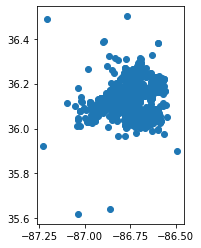

In [11]:
derecho_calls_geo.plot()

<AxesSubplot:>

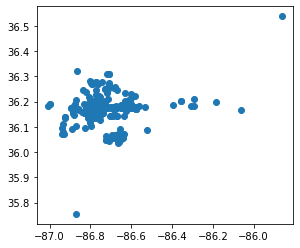

In [12]:
tornado_calls_geo.plot()

<AxesSubplot:>

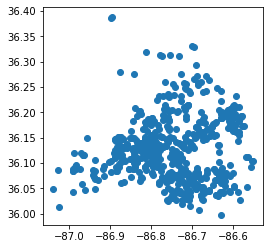

In [13]:
derecho_dispatch_geo.plot()

<AxesSubplot:>

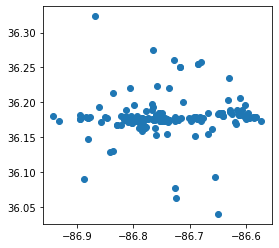

In [14]:
tornado_dispatch_geo.plot()

<AxesSubplot:>

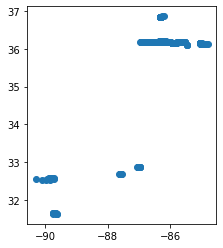

In [15]:
damage_points.plot()

<AxesSubplot:>

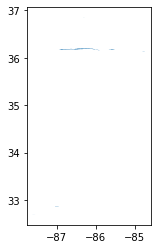

In [16]:
path_polygons.plot()

<AxesSubplot:>

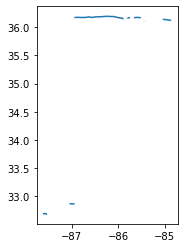

In [17]:
tornado_paths.plot()

In [18]:
map = folium.Map(location = [36.134256, -86.822034], zoom_start = 10)

#folium.GeoJson(damage_points).add_to(map)

folium.GeoJson(path_polygons).add_to(map)

folium.GeoJson(tornado_paths, style_function = lambda x: {'color':'#ffc183', 'fillcolor':'#ffc183'}).add_to(map)

damageArr = damage_points_lat_lng.values
#map.add_child(plugins.HeatMap(damageArr, radius = 15))

map

In [19]:
map = folium.Map(location = [36.134256, -86.822034], zoom_start = 10)

#folium.GeoJson(derecho_calls_geo_dropna).add_to(map)

folium.GeoJson(tornado_calls_geo_dropna).add_to(map)

#folium.GeoJson(derecho_dispatch_geo_str).add_to(map)

#folium.GeoJson(tornado_dispatch_geo_str).add_to(map)


map

TypeError: Object of type Timestamp is not JSON serializable

In [ ]:
map = folium.Map(location = [36.134256, -86.822034], zoom_start = 10)

for row_index, row_values in tornado_calls_geo_dropna.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['cell_tower_add'])
    
    marker = folium.CircleMarker(location = loc, radius = 1.5, popup = pop, weight = 2, color = 'red')
    
    marker.add_to(map)

for row_index, row_values in tornado_dispatch_geo.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['desc'])
    
    marker = folium.CircleMarker(location = loc, radius = 1.5, popup = pop, weight = 2, color = 'green')
    
    marker.add_to(map)

folium.GeoJson(path_polygons, style_function = lambda x: {'color': '#000000'}).add_to(map)

map


In [ ]:
map = folium.Map(location = [36.134256, -86.822034], zoom_start = 10)

for row_index, row_values in derecho_calls_geo_dropna.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['cell_tower_add'])
    
    marker = folium.CircleMarker(location = loc, radius = 1, popup = pop, weight = 2, color = 'red')
    
    marker.add_to(map)


for row_index, row_values in derecho_dispatch_geo.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['desc'])
    
    marker = folium.CircleMarker(location = loc, radius = 1, popup = pop, weight = 2, color = 'black')
    
    marker.add_to(map)
    
map

## 1. Develop a timeline of each storm based on the call locations and volume. This can include the following:
#### - Beginning and end of the event, based on call times
#### - Times of stronger storm impacts, based on call volumes


In [ ]:
derecho_calls.tail()

In [ ]:
tornado_calls.tail()

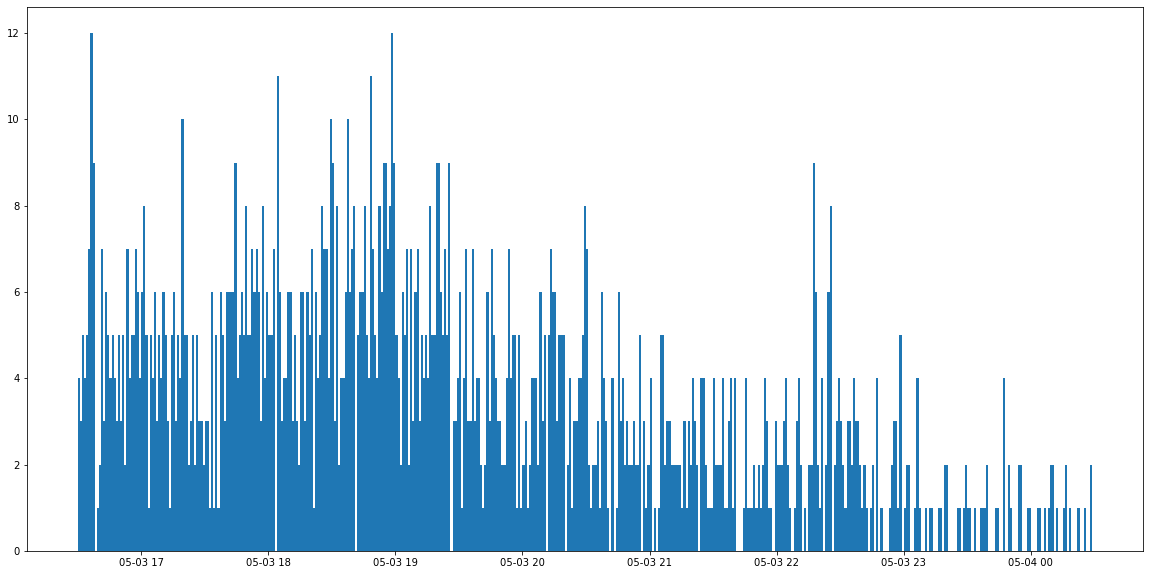

In [21]:
plt.figure(figsize = (20, 10))
plt.hist(derecho_calls.time, bins = 479); #479 is the number of minutes from the first to last call of this dataset


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
# Importing the necessary libraries
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats

dt = np.random.normal(0, 1, 1000)

# Plotting the sample data on histogram and getting the bins
_, bins, _ = plt.hist(dt, 25, density=1, alpha=0.5)


# Getting the mean and standard deviation of the sample data dt
mn, std = scipy.stats.norm.fit(dt)


# Getting the best fit curve y values against the x data, bins
y_curve = scipy.stats.norm.pdf(bins, mn, std)

# Plotting the best fit curve
plt.plot(bins, y_curve, 'k')

plt.title('Best fit curve for histogram')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

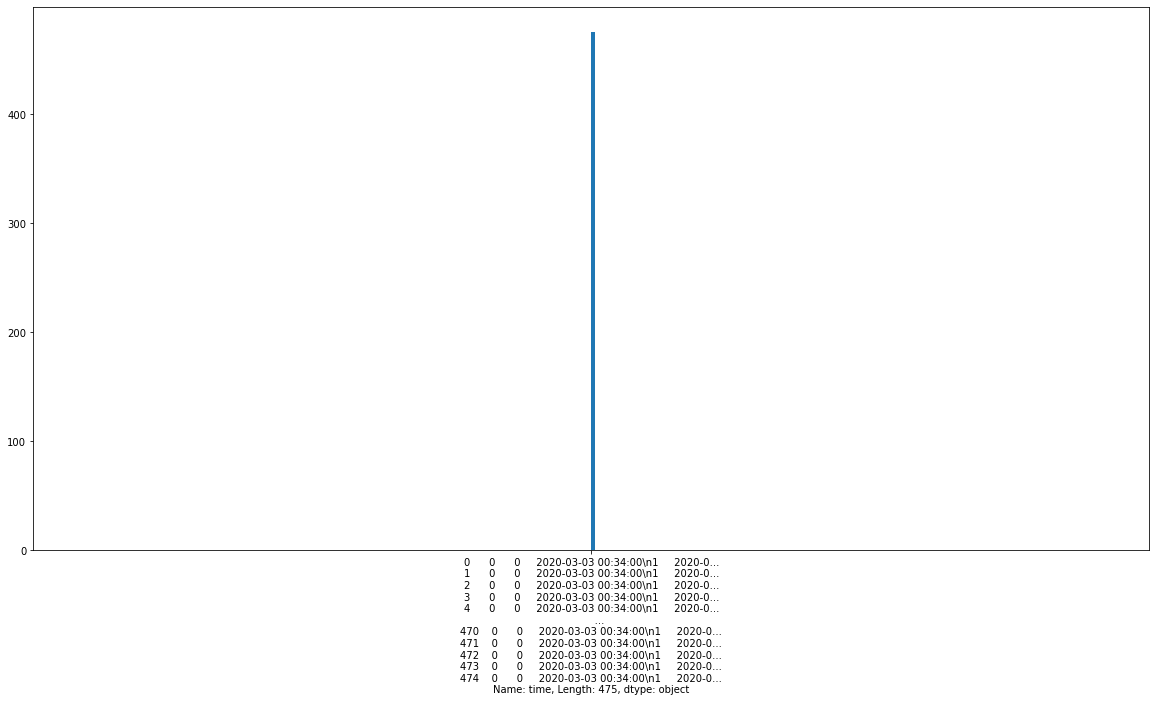

In [34]:
plt.figure(figsize = (20, 10))
plt.hist(tornado_calls.time, bins = 254); #254 is the number of minutes from the first to last call of this dataset.